In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('./Fish.csv')
print(df.shape)

(159, 7)


In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [10]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

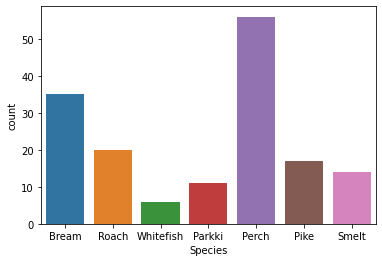

In [13]:
sns.countplot(data=df, x='Species')

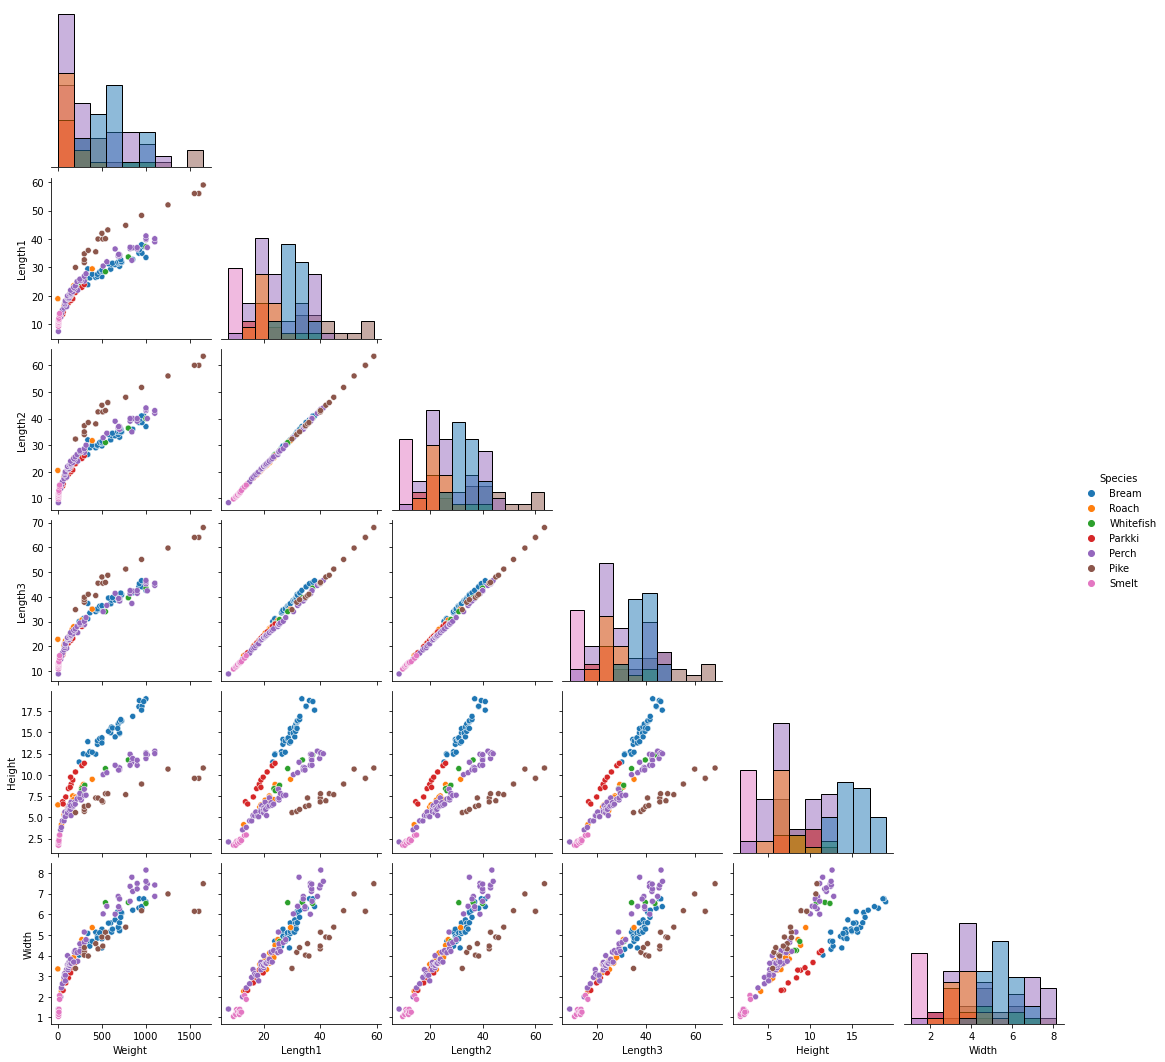

In [25]:
sns.pairplot(data=df, kind='scatter', hue='Species', diag_kind='hist', corner=True)

In [30]:
y = df['Weight']
X = df.iloc[:, 2:]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
def solveLinearModel(y: np.ndarray, X: np.ndarray):
    x = np.matmul(X.T, X)
    x = np.linalg.inv(x)
    x = np.matmul(x, X.T)
    return np.matmul(x, y)

In [73]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(127, 5)
(127,)
(32, 5)
(32,)


In [100]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
ones = np.empty(X_train_np.shape[0])
ones.fill(1)
ones = ones.reshape(-1, 1)
X_train_np = np.append(ones, X_train_np, axis=1)

X_test_np = X_test.to_numpy()
ones_test = np.empty(X_test_np.shape[0])
ones_test.fill(1)
ones_test = ones_test.reshape(-1, 1)
X_test_np = np.append(ones_test, X_test_np, axis=1)

In [102]:

beta = solveLinearModel(y_train_np, X_train_np)
beta = beta.reshape(-1, 1)
y_pred_mat = np.matmul(X_test_np, beta)
y_pred_mat

array([[  77.68563317],
       [-159.12460639],
       [ 385.1673549 ],
       [ 300.26119445],
       [ 179.41023158],
       [ 775.66726232],
       [-214.43415538],
       [ 274.90963757],
       [ 268.44510975],
       [1116.01153223],
       [ 610.12007978],
       [ 786.34393233],
       [ 585.01831604],
       [ 172.12366335],
       [ 652.8595541 ],
       [ 785.41425179],
       [ 926.40448191],
       [ 351.83433222],
       [ 256.32442006],
       [ 587.20219745],
       [-175.74829352],
       [ 619.14709502],
       [ 516.45091187],
       [ 515.98797368],
       [ 788.64695281],
       [ 909.00622172],
       [ 219.68134027],
       [ 305.35126984],
       [-237.80116525],
       [-178.93943304],
       [ 688.57820552],
       [  23.23863135]])

In [103]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_, model.intercept_)
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_pred, y_test))
print('R2-score:', r2_score(y_pred, y_test))

[ 43.5352649    7.82179624 -25.25670105  23.2289123   27.06649294] -515.3056513384327
MSE: 16763.88719314074
R2-score: 0.8720269140304431


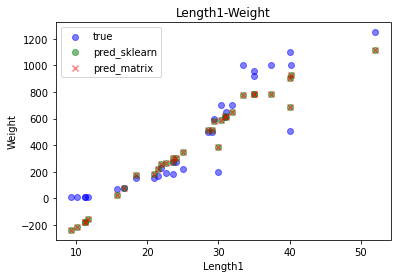

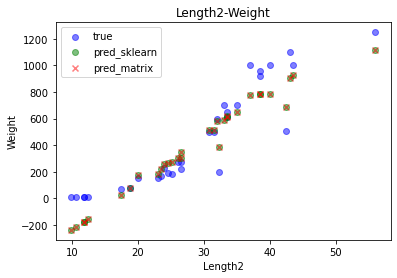

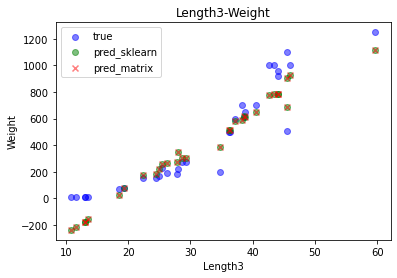

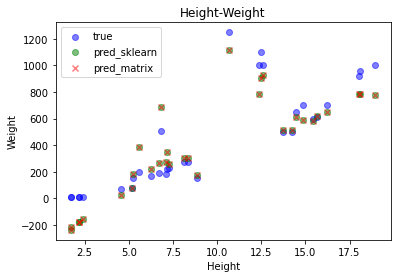

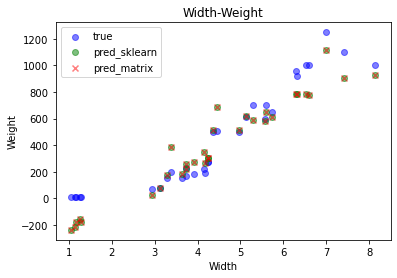

In [107]:
for feature in ['Length1', 'Length2', 'Length3', 'Height', 'Width']:
    plt.scatter(X_test[feature], y_test, label='true', color='b', alpha=0.5)
    plt.scatter(X_test[feature], y_pred, label='pred_sklearn', color='g', alpha=0.5)
    plt.scatter(X_test[feature], y_pred_mat, label='pred_matrix', color='r', alpha=0.5, marker='x')
    plt.xlabel(feature)
    plt.ylabel('Weight')
    
    #plt.plot(x_new, y_new, color='b')
    
    plt.title(f'{feature}-Weight')
    plt.legend()
    plt.show()